test perso de sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Meilleur score sur les données de test : 1.0
Meilleurs hyperparamètres trouvés : {'modele__n_estimators': 10}
Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



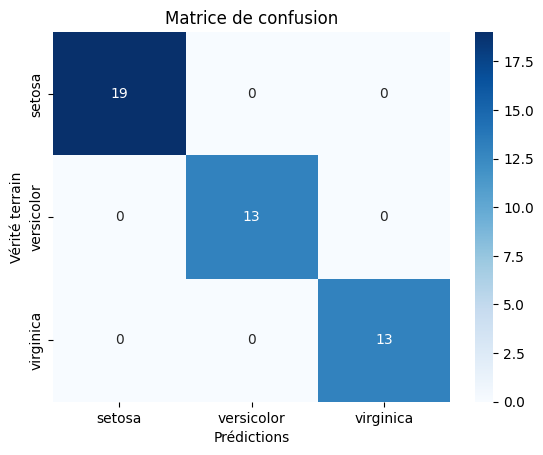

In [9]:
iris = load_iris()

X, y = iris.data, iris.target

#diviser les data
Xtrain, Xtest,ytrain,  ytest = train_test_split(X,y, test_size=0.30, random_state=42)
#standardiser et appliquer la cross validation
pipe = Pipeline(
        [
        ("scale", StandardScaler()),
        ("modele", RandomForestClassifier(n_estimators=20, random_state=42))
        ])
modele = GridSearchCV(estimator=pipe,
                      param_grid={"modele__n_estimators": [10,15,20,30,]},
                      cv=4,
                      n_jobs=-1)
modele.fit(Xtrain, ytrain)
pred = modele.predict(Xtest)
score = modele.score(Xtest, ytest)
print("Meilleur score sur les données de test :", score)
print("Meilleurs hyperparamètres trouvés :", modele.best_params_)

print("Rapport de classification :")
print(classification_report(ytest, pred, target_names=iris.target_names))

# Matrice de confusion
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion")
plt.show()